# Problem_statement(Fraudcheck)

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [2]:
fraud=pd.read_csv("/content/Fraud_check.csv")

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [4]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

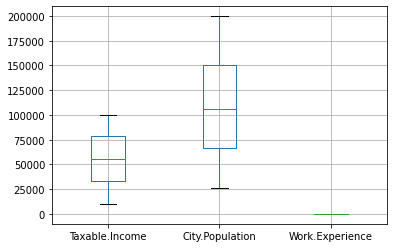

In [9]:
# boxplot
fraud.boxplot()

In [10]:
#convert categorical value

bins = [0,30000, np.inf]   #infinite values=np.inf
names = ['Risk', 'Good']

fraud['Taxable.Income'] = pd.cut(fraud['Taxable.Income'], bins, labels=names)

fraud['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risk' < 'Good']

In [11]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [12]:
# for convert categorical to int

categorical = [col for col in fraud.columns if fraud[col].dtype==object]

for col in categorical:
    temp = {}
    count = 0
    for val in fraud[col].values:
        try:
            temp[val]
        except:
            temp[val] = count
            count += 1
    fraud[col] = [temp[x] for x in fraud[col].values]
print(fraud[categorical])

     Undergrad  Marital.Status  Urban
0            0               0      0
1            1               1      0
2            0               2      0
3            1               0      0
4            0               2      1
..         ...             ...    ...
595          1               1      0
596          1               1      0
597          0               1      0
598          1               2      1
599          0               1      1

[600 rows x 3 columns]


In [13]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,Good,50047,10,0
1,1,1,Good,134075,18,0
2,0,2,Good,160205,30,0
3,1,0,Good,193264,15,0
4,0,2,Good,27533,28,1
...,...,...,...,...,...,...
595,1,1,Good,39492,7,0
596,1,1,Good,55369,2,0
597,0,1,Good,154058,0,0
598,1,2,Good,180083,17,1


## Model Training

In [14]:
#feture selection
y = fraud['Taxable.Income']
fraud.drop(['Taxable.Income'], axis=1, inplace=True)
x = fraud
del fraud

In [15]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,0
1,1,1,134075,18,0
2,0,2,160205,30,0
3,1,0,193264,15,0
4,0,2,27533,28,1
...,...,...,...,...,...
595,1,1,39492,7,0
596,1,1,55369,2,0
597,0,1,154058,0,0
598,1,2,180083,17,1


In [16]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risk' < 'Good']

In [17]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)  # default 80% training 20% test

In [18]:
x_train.shape

(450, 5)

In [19]:
y_train.shape

(450,)

# Decision Tree

## Building Decision Tree Classifier using Entropy Criteria

In [20]:
from sklearn import tree

In [21]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [22]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=40)


In [23]:
y_train.value_counts()

Good    356
Risk     94
Name: Taxable.Income, dtype: int64

In [24]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=40)

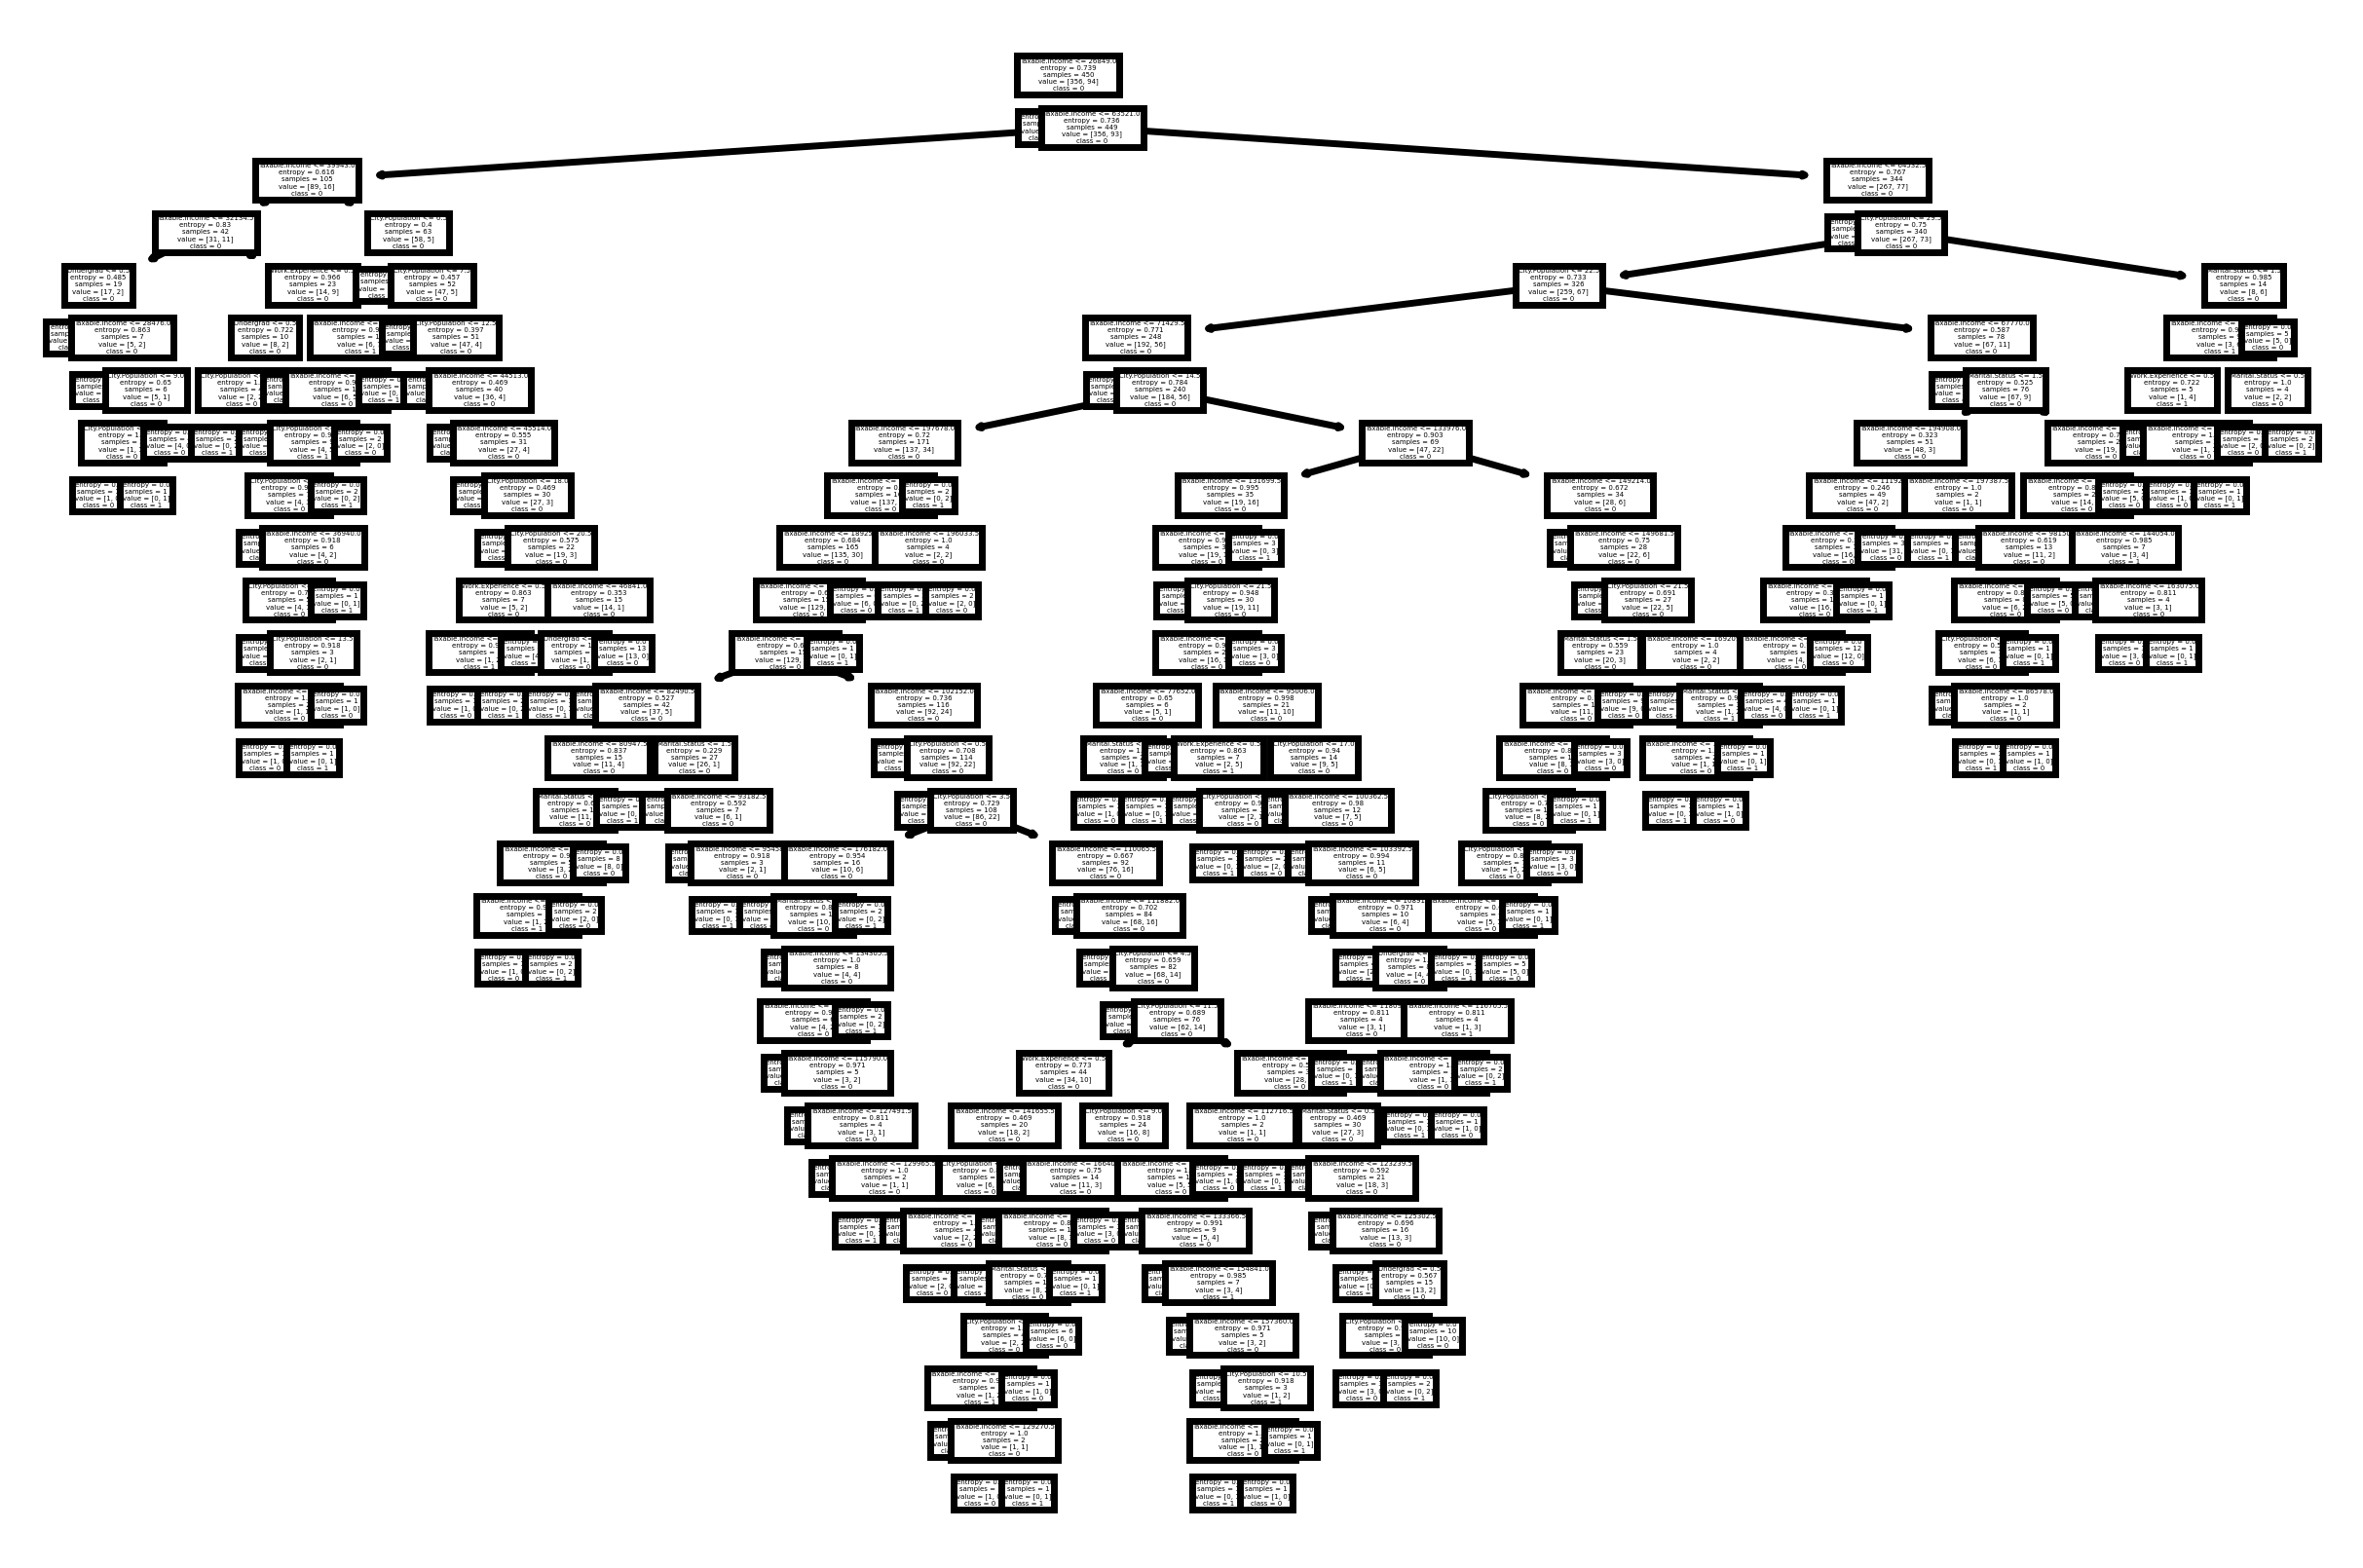

In [25]:
fn=['Undergrad',	'Marital.Status',	'Taxable.Income',	'City.Population',	'Work.Experience'	,'Urban']
cn=['0','1']    #.value_count.keys

import matplotlib.pyplot as plt
fix,ax=plt.subplots(dpi=500)
#plt.Figure(dpi=3000)
plot_tree(dtc,feature_names=fn,class_names=cn)
plt.show()

In [26]:
pred=dtc.predict(x_test)
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risk', 'Good', 'Risk', 'Risk', 'Risk', 'Good',
       'Risk', 'Good', 'Good', 'Good', 'Good', 'Risk', 'Risk', 'Good',
       'Good', 'Risk', 'Good', 'Good', 'Good', 'Risk', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risk', 'Good', 'Good', 'Risk', 'Risk',
       'Risk', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risk', 'Good',
       'Good', 'Good', 'Risk', 'Good', 'Good', 'Risk', 'Good', 'Good',
       'Risk', 'Good', 'Good', 'Risk', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risk', 'Risk', 'Good', 'Risk', 'Good', 'Risk',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risk', 'Good', 'Risk', 'Good', 'Good', 'Risk', 'Good', 'Risk',
       'Good', 'Risk', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risk', 'Good', 'Good', 'Risk', 'Good', 'Good', 'Good', 'Risk',
       'Risk', 'Risk', 'Risk', 'Risk', 'Risk', 'Good', 'Good', 'Good',
      

In [27]:
# model Confusion Accuracy
    
print("Report : ",classification_report(y_test,pred))

Report :                precision    recall  f1-score   support

        Good       0.80      0.72      0.75       120
        Risk       0.19      0.27      0.22        30

    accuracy                           0.63       150
   macro avg       0.49      0.49      0.49       150
weighted avg       0.68      0.63      0.65       150



In [28]:
confusion_matrix(y_test, pred)

array([[86, 34],
       [22,  8]])

In [29]:
##Accuracy
acc=accuracy_score(y_test,pred)
acc

0.6266666666666667

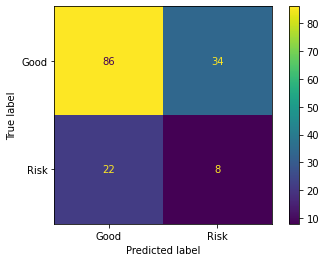

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [31]:
fraud_final=pd.DataFrame({'Actual':y_test, 'Predicted':pred})

In [32]:
fraud_final

,Actual,Predicted
133,Good,Good
101,Good,Good
15,Good,Good
2,Good,Good
227,Good,Good
...,...,...
440,Good,Good
599,Good,Risk
61,Risk,Good
419,Good,Good


In [33]:
dtc.feature_importances_

array([0.04073786, 0.0972618 , 0.64177097, 0.18165991, 0.03856946])

## Building Decision Tree Classifier (CART) using Gini Criteria

In [34]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [35]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
#Prediction and computing the accuracy
pred=dtc.predict(x_test)
np.mean(pred==y_test)

0.6266666666666667

# Company Data(problem statement)

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [38]:
comp=pd.read_csv("/content/Company_Data.csv")

In [39]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [40]:
comp["Sales"].mean()

7.496325000000001

In [41]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [42]:

comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [43]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [44]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [45]:
#convert categorical value

bins = [0,7.49, np.inf]   #infinite values=np.inf
names = ['bad', 'Good']

comp['Sales.S'] = pd.cut(comp['Sales'], bins, labels=names)

comp['Sales.S']

0      Good
1      Good
2      Good
3       bad
4       bad
       ... 
395    Good
396     bad
397     bad
398     bad
399    Good
Name: Sales.S, Length: 400, dtype: category
Categories (2, object): ['bad' < 'Good']

In [46]:
comp.drop(["Sales"], axis =1, inplace = True)

In [47]:
comp

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales.S
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,117,100,4,466,97,Medium,55,14,Yes,Yes,bad
4,141,64,3,340,128,Bad,38,13,Yes,No,bad
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,Good
396,139,23,3,37,120,Medium,55,11,No,Yes,bad
397,162,26,12,368,159,Medium,40,18,Yes,Yes,bad
398,100,79,7,284,95,Bad,50,12,Yes,Yes,bad


In [48]:
comp.isna().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
Sales.S        1
dtype: int64

In [49]:
comp.dtypes

CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc        object
Age               int64
Education         int64
Urban            object
US               object
Sales.S        category
dtype: object

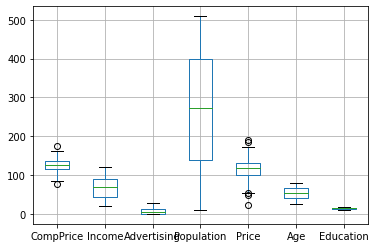

In [50]:
comp.boxplot()

# Model Training

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# for convert categorical to int

categorical = [col for col in comp.columns if comp[col].dtype==object]

for col in categorical:
    temp = {}
    count = 0
    for val in comp[col].values:
        try:
            temp[val]
        except:
            temp[val] = count
            count += 1
    comp[col] = [temp[x] for x in comp[col].values]
print(comp[categorical])

     ShelveLoc  Urban  US
0            0      0   0
1            1      0   0
2            2      0   0
3            2      0   0
4            0      0   1
..         ...    ...  ..
395          1      0   0
396          2      1   0
397          2      0   0
398          0      0   0
399          1      0   0

[400 rows x 3 columns]


In [53]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CompPrice    400 non-null    int64   
 1   Income       400 non-null    int64   
 2   Advertising  400 non-null    int64   
 3   Population   400 non-null    int64   
 4   Price        400 non-null    int64   
 5   ShelveLoc    400 non-null    int64   
 6   Age          400 non-null    int64   
 7   Education    400 non-null    int64   
 8   Urban        400 non-null    int64   
 9   US           400 non-null    int64   
 10  Sales.S      399 non-null    category
dtypes: category(1), int64(10)
memory usage: 31.9 KB


In [54]:
df=comp
df


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales.S
0,138,73,11,276,120,0,42,17,0,0,Good
1,111,48,16,260,83,1,65,10,0,0,Good
2,113,35,10,269,80,2,59,12,0,0,Good
3,117,100,4,466,97,2,55,14,0,0,bad
4,141,64,3,340,128,0,38,13,0,1,bad
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0,Good
396,139,23,3,37,120,2,55,11,1,0,bad
397,162,26,12,368,159,2,40,18,0,0,bad
398,100,79,7,284,95,0,50,12,0,0,bad


In [55]:
comp['Sales.S']=comp['Sales.S'].map({'Good':1,'Medium':2,'Bad':3})

In [56]:
comp

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales.S
0,138,73,11,276,120,0,42,17,0,0,1.0
1,111,48,16,260,83,1,65,10,0,0,1.0
2,113,35,10,269,80,2,59,12,0,0,1.0
3,117,100,4,466,97,2,55,14,0,0,NaN
4,141,64,3,340,128,0,38,13,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0,1.0
396,139,23,3,37,120,2,55,11,1,0,NaN
397,162,26,12,368,159,2,40,18,0,0,NaN
398,100,79,7,284,95,0,50,12,0,0,NaN


In [57]:
comp['Sales.S'] =comp['Sales.S'].fillna(0)

In [58]:
comp

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales.S
0,138,73,11,276,120,0,42,17,0,0,1.0
1,111,48,16,260,83,1,65,10,0,0,1.0
2,113,35,10,269,80,2,59,12,0,0,1.0
3,117,100,4,466,97,2,55,14,0,0,0.0
4,141,64,3,340,128,0,38,13,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0,1.0
396,139,23,3,37,120,2,55,11,1,0,0.0
397,162,26,12,368,159,2,40,18,0,0,0.0
398,100,79,7,284,95,0,50,12,0,0,0.0


In [59]:
x=df.iloc[:,:10]
y=df['Sales.S']

In [60]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,0,0
1,111,48,16,260,83,1,65,10,0,0
2,113,35,10,269,80,2,59,12,0,0
3,117,100,4,466,97,2,55,14,0,0
4,141,64,3,340,128,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0
396,139,23,3,37,120,2,55,11,1,0
397,162,26,12,368,159,2,40,18,0,0
398,100,79,7,284,95,0,50,12,0,0


In [61]:
y

0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
395    1.0
396    0.0
397    0.0
398    0.0
399    1.0
Name: Sales.S, Length: 400, dtype: float64

In [62]:
df['Sales.S'].unique()

array([1., 0.])

In [63]:
column=list(comp.columns)
column

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'Sales.S']

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y)  # default 80% training 20% test

In [65]:
x_train.shape

(300, 10)

In [66]:
y_train.shape

(300,)

In [67]:
y_train

195    0.0
196    0.0
137    0.0
150    1.0
197    0.0
      ... 
200    0.0
78     0.0
177    1.0
274    0.0
270    1.0
Name: Sales.S, Length: 300, dtype: float64

## Building Decision Tree Classifier using Entropy Criteria

In [68]:
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

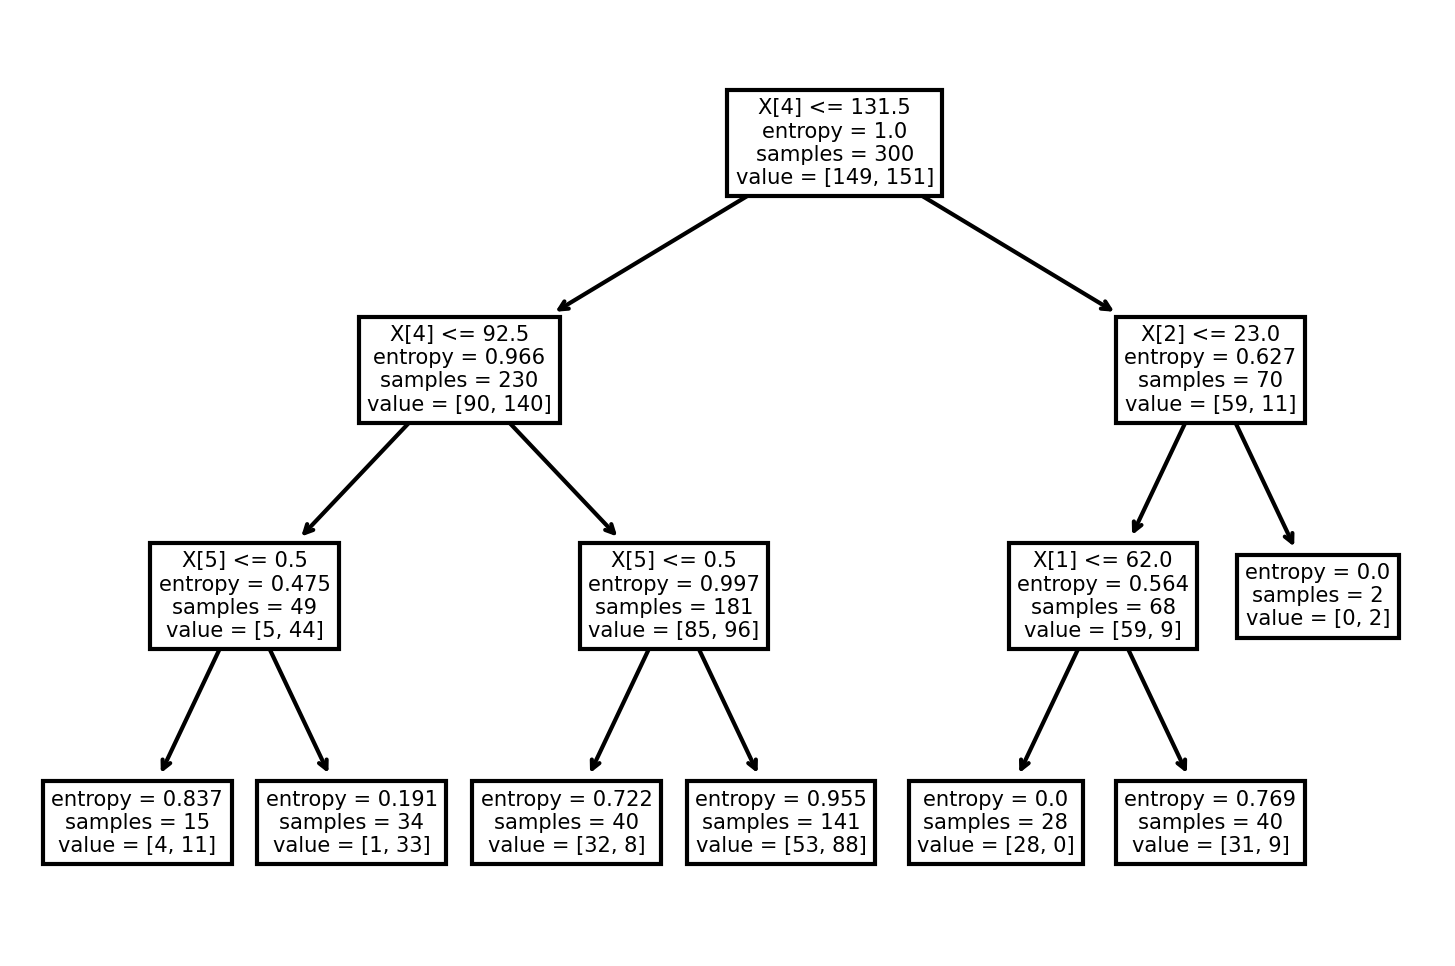

In [69]:
#PLot the decision tree
fig, axes = plt.subplots(dpi=300)
tree.plot_tree(dtc);

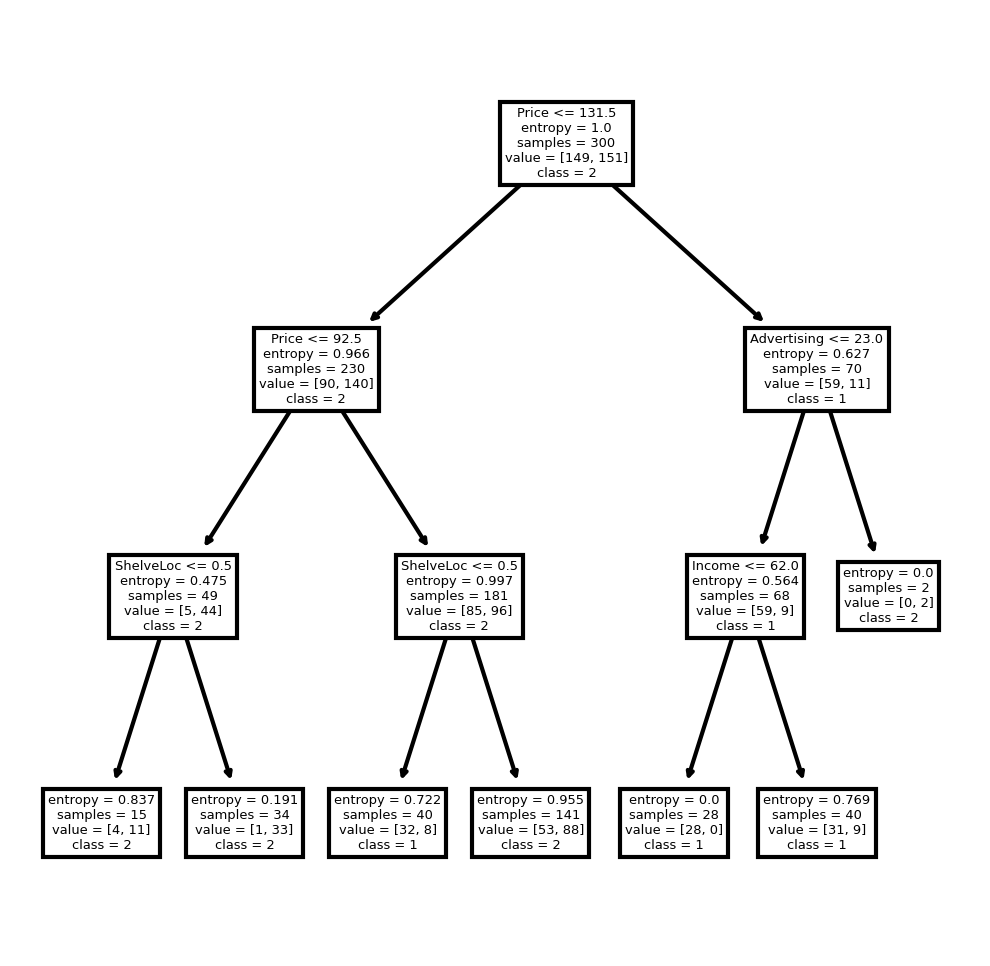

In [70]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtc,feature_names = fn, class_names=cn);

#### Predicting on test data

In [71]:
# predicting on test data set 
pred1= dtc.predict(x_test) 
# getting the count of each category
pd.Series(pred1).value_counts() 

1.0    60
0.0    40
dtype: int64

In [72]:
pred1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.])

### Accuracy

In [73]:
accuracy_score(y_test,pred1)*100

66.0

# Decision Tree

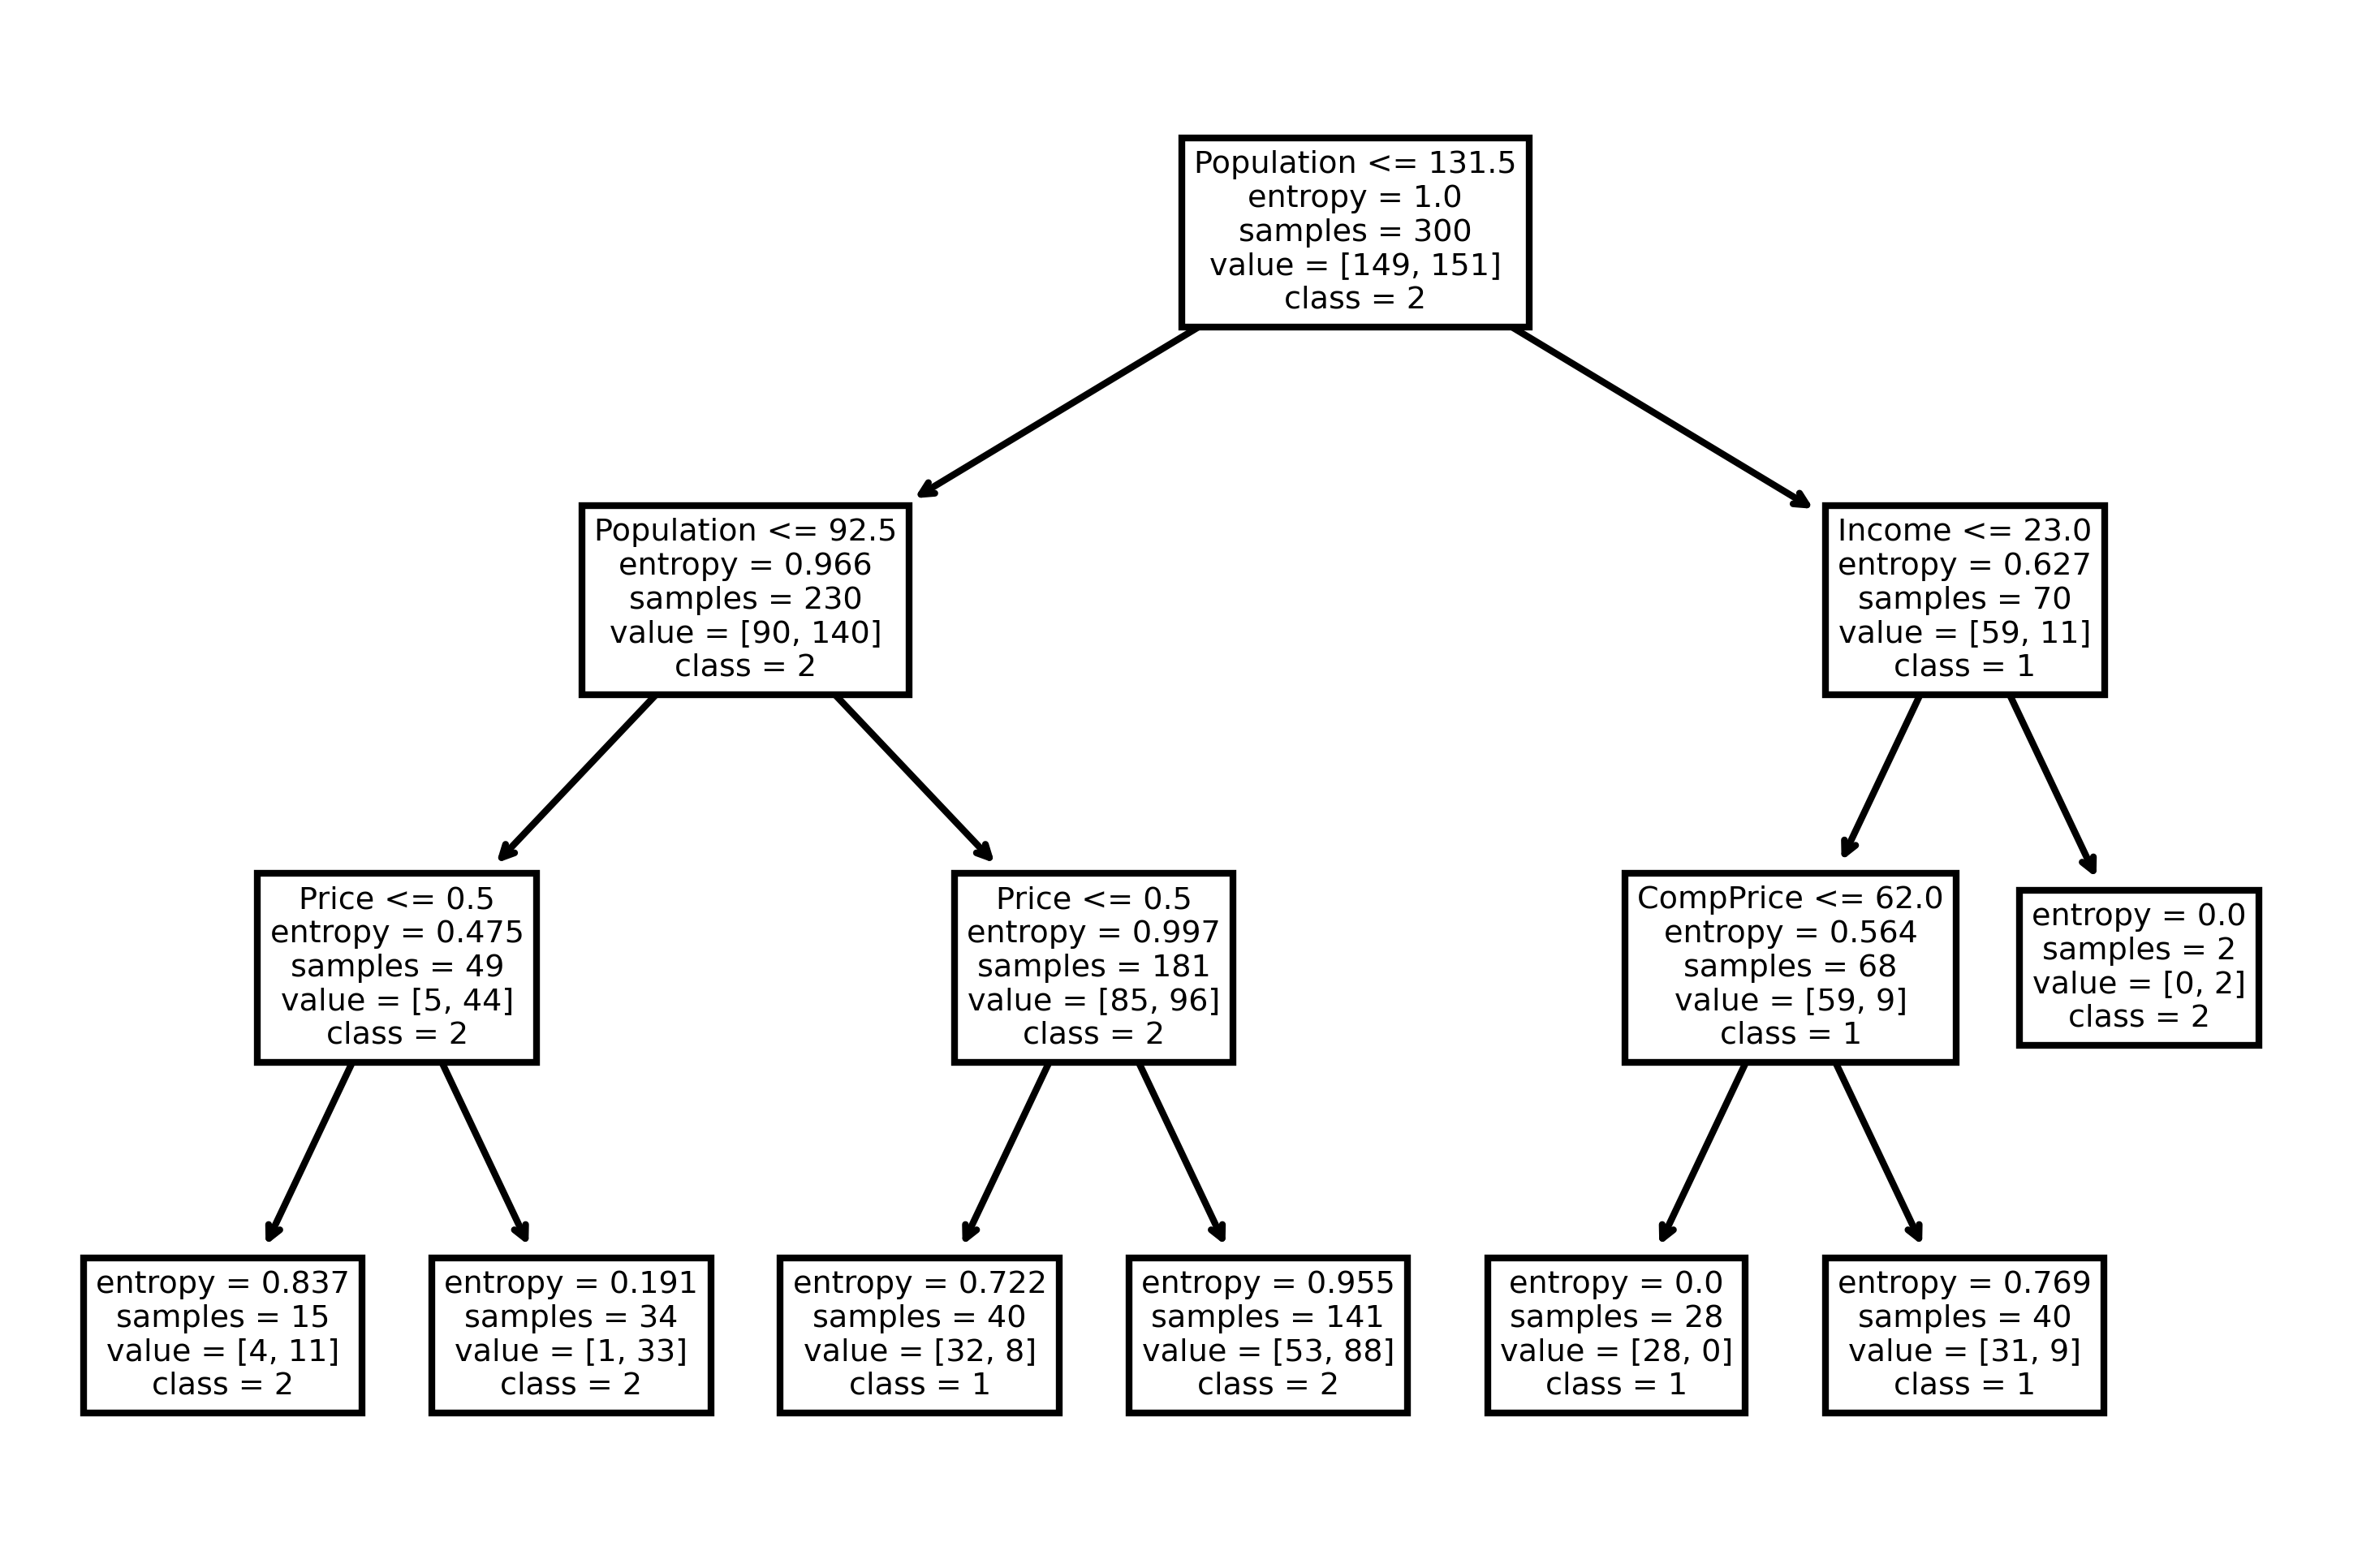

In [74]:
fn=['Sales.S','CompPrice','Income','Advertising','Population','Price','ShelveLoc',
 'Age','Education','Urban_Yes','US_Yes']

cn=['1', '2', '3']
import matplotlib.pyplot as plt
fix,ax=plt.subplots(dpi=600)
#plt.Figure(dpi=3000)
plot_tree(dtc,feature_names=fn,class_names=cn)
plt.show()

## Building Decision Tree Classifier (CART) using Gini Criteria

In [75]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [76]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [77]:
#Prediction and computing the accuracy
pred2=dtc.predict(x_test)
np.mean(pred2==y_test)

0.66

In [78]:
pred2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.])

### Accuracy

In [79]:
accuracy_score(y_test,pred2)*100

66.0